In [1]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
df= pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Adding the feature names to the dataframe
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['PRICE']=boston.target

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
X = np.array(df.drop(['PRICE'], axis=1))
#X = X[:, [5, 10, 12]]
y = np.array(df['PRICE'])
indices = y < 50
y= y[indices]
X= X[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# X = data.drop(['charges','age','children','region', 'sex'],axis = 1)
# y = data.charges
# X = np.array(X)
# y = np.array(y)

In [12]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(392, 13)
(98, 13)
(392,)
(98,)


In [23]:
reg1 = ldtr(max_depth= 2)
reg2 = LinearRegression(n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'rbf')
reg5 = DecisionTreeRegressor(max_depth = 2, min_samples_leaf= 3, min_samples_split= 6)
reg6 = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
reg7 = RandomForestRegressor(max_depth = 2,n_jobs = -1)

In [24]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)

Decision Best 369 0.5
97.867355 97.867355 97.867355
Decision Best 68 353.4650115966797
80.47797 80.47797 107.70835
Decision Best 291 16.0
84.80266 84.80266 107.70835
Decision Best 229 19.65000057220459
76.31202 76.31202 107.70835
Decision Best 229 19.65000057220459
76.31202 76.31202 107.70835
Decision Best 161 9.724999904632568
47.429512 47.429512 107.70835
Decision Best 161 9.724999904632568
47.429512 47.429512 107.70835
Decision Best 161 9.724999904632568
47.429512 47.429512 95.09883
Decision Best 161 9.724999904632568
47.429512 47.429512 93.624985
Decision Best 161 9.724999904632568
47.429512 47.429512 95.21344
Decision Best 161 9.724999904632568
47.429512 47.429512 95.21344
Decision Best 161 9.724999904632568
47.429512 47.429512 95.21344
47.429512 64.273155 58.353764
12 161
linear Best 56 16.84999942779541
73.3539 86.843285 73.3539
Decision Best 28 15.25
86.843285 86.843285 90.52718
Decision Best 28 15.25
86.843285 86.843285 90.52718
Decision Best 28 15.25
86.843285 86.843285 96.64

B:\Research\Decision Tree Regressor Combined with Linear Regressor\code\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


12 68
5 202
5 206
5 202
5 32
12 127
12 157
12 129
5 234
12 117
5 239
5 238
5 216
12 82
5 190
12 78
5 56
5 58
12 132
5 247
12 174
12 111
5 223
12 167
5 195
5 215
12 132
12 106
5 189
5 235
12 129
5 87
10 250
12 115
12 202
5 251
5 198
12 101
5 210
12 119
5 76
5 236
12 93
12 170
5 67
12 122
12 225
12 104
12 164
5 199
5 81
5 201
0 198
12 119
12 211
12 71
5 41
12 132
5 209
5 236
5 165
12 164
12 117
5 243
12 125
12 100
5 226
5 76
12 109
12 120
5 78
12 216
12 106
5 78
5 85
12 201
12 202
5 204
12 203
12 74
5 173
5 44
12 119
10 245
5 218
12 109
12 169
5 233
5 200
12 129
5 243
5 203
12 114
12 129
5 233
5 197
0 166
5 106
5 244
12 120
5 179
7 171
5 242
5 203
12 95
5 224
5 192
5 205
12 116
5 234
12 125
5 225
12 138
5 204
5 233
5 191
12 111
5 202
5 241
12 121
12 105
5 225
5 61
12 119
5 233
12 152
5 211
12 211
5 111
5 196
12 138
0 208
5 240
5 201
12 113
5 235
12 98
12 82
12 121
5 58
5 46
5 240
12 105
0 211
4 200
5 61
12 103
5 208
12 214
12 119
5 71
5 75
12 202
12 129
12 132
12 199
5 239
5 90
12 99
0 2

RandomForestRegressor(max_depth=2, n_jobs=-1)

In [25]:
reg2.coef_

array([-1.22096140e-01,  3.24934065e-02, -4.51945652e-02,  6.32525034e-02,
       -1.17444911e+01,  3.61793376e+00, -2.00394486e-02, -1.21059188e+00,
        2.47235697e-01, -1.31042159e-02, -8.35556922e-01,  8.18076684e-03,
       -3.81616606e-01])

In [26]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)
y_pred6 = reg6.predict(X_test)
y_pred7 = reg7.predict(X_test)

In [27]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred6))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred7))

Mean squared error: 8.02
Mean squared error: 12.06
Mean squared error: 59.08
Mean squared error: 29.02
Mean squared error: 21.44
Mean squared error: 307819565272189.75
Mean squared error: 13.53


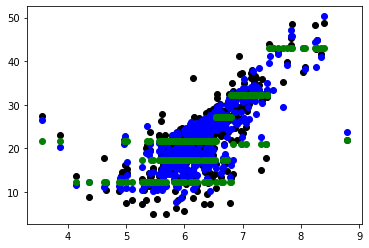

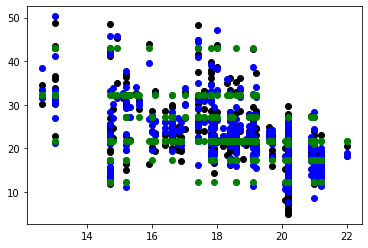

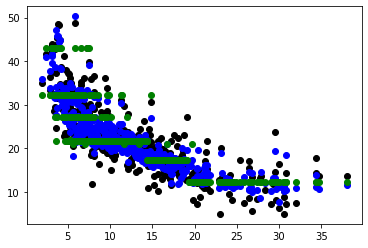

In [46]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg5.predict(X_train),  color='green')
    plt.show()